In [1]:
# Recreate an illustrative "adiabatic evolution on eigenenergy landscape" plot
# - Pure matplotlib, no seaborn, no custom color settings (defaults only)
# - Written for a Jupyter cell; saves PNG and SVG for export

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
from matplotlib.patheffects import withStroke



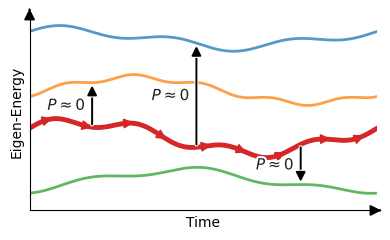

In [2]:
# Transition arrows from the tracked path to the other eigenenergy levels

# Time axis
t = np.linspace(0, 1, 400)

# Toy eigenenergy bands (just smooth curves)
bands = [
    2.2 + 0.10*np.sin(2*np.pi*(t+0.15)) + 0.05*np.sin(6*np.pi*t),
    1.6 + 0.15*np.sin(2*np.pi*(t-0.05)) - 0.03*np.cos(10*np.pi*t),
    1.05 + 0.18*np.sin(2*np.pi*(t+0.10)) + 0.06*np.sin(8*np.pi*t),
    0.55 + 0.12*np.sin(2*np.pi*(t-0.18)) - 0.04*np.cos(6*np.pi*t),
]

# "Adiabatic path" that tracks the 3rd band with small avoided-crossing-like dip
path = bands[2].copy()
dip_center = 0.62


fig, ax = plt.subplots(figsize=(4, 2.5))
FIG_INTRO = fig  # keep a handle for downstream export cells

# Plot eigenenergy bands
for idx, y in enumerate(bands):
    if idx == 2:
        continue  # skip the tracked band so only the highlighted path remains
    ax.plot(t, y, lw=2, alpha=0.75)

# Plot the followed eigenstate path with slightly thicker line
(path_line,) = ax.plot(t, path, lw=3.5)
path_color = path_line.get_color()


def add_path_arrow(tau: float, *, length: float = 0.07) -> None:
    """Place a short arrow tangent to the followed path at time ``tau``."""

    idx = np.searchsorted(t, tau)
    idx = np.clip(idx, 1, t.size - 2)
    dt = t[idx + 1] - t[idx - 1]
    dy = path[idx + 1] - path[idx - 1]
    norm = np.hypot(dt, dy)
    if norm == 0.0:
        return
    direction = np.array([dt, dy]) / norm
    start = np.array([t[idx], path[idx]]) - 0.5 * length * direction
    end = start + length * direction
    arrow = FancyArrowPatch(
        tuple(start),
        tuple(end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=path_color,
        zorder=1,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)


def interp_curve(curve: np.ndarray, tau: float) -> float:
    """Return the value of ``curve`` at a fractional time ``tau`` using linear interp."""

    return float(np.interp(tau, t, curve))


def transition_arrow(
    tau: float,
    target_curve: np.ndarray,
    label: str,
    *,
    text_align: str = "left",
    color: str = "#000000",
) -> None:
    """Draw a single-headed arrow pointing from the tracked path to ``target_curve``."""

    y_start = interp_curve(path, tau)
    y_end = interp_curve(target_curve, tau)
    arrow = FancyArrowPatch(
        (tau, y_start),
        (tau, y_end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=color,
        zorder=6,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)

    offset = 0.018 if text_align == "left" else -0.018
    ha = "left" if text_align == "left" else "right"
    ax.text(
        tau + offset,
        0.5 * (y_start + y_end),
        label,
        ha=ha,
        va="center",
        fontsize=11,
        color="#222222",
        path_effects=[withStroke(linewidth=3, foreground="white")],
    )


arrow_times = np.linspace(0.05, 0.95, 9)
for tau in arrow_times:
    add_path_arrow(float(tau))

transition_specs = [
    (0.18, bands[1], r"$P \approx 0$", "right"),
    (0.48, bands[0], r"$P \approx 0$", "right"),
    (0.78, bands[3], r"$P \approx 0$", "right"),
]
for tau, target, label, align in transition_specs:
    transition_arrow(tau, target, label, text_align=align)

# Labels and axes styling
ax.set_xlabel("Time")
ax.set_ylabel("Eigen-Energy")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.2, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
axis_arrow_style = dict(arrowstyle="-|>", mutation_scale=16, lw=1.3, color="#000000")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate("", xy=(x1 + 0.02 * (x1 - x0), y0), xytext=(x1, y0),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax.annotate("", xy=(x0, y1 + 0.02 * (y1 - y0)), xytext=(x0, y1),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
plt.tight_layout()
plt.show()


In [3]:
from pathlib import Path

if "FIG_INTRO" not in globals():
    raise RuntimeError("Run the plotting cell first to populate FIG_INTRO.")

fig = FIG_INTRO
fig.canvas.draw()  # ensure the canvas is populated before exporting

output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/")
png_path = output_dir / "adiabatic_path_following.png"
svg_path = output_dir / "adiabatic_path_following.svg"
pdf_path = output_dir / "adiabatic_path_following.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/adiabatic_path_following.png, /home/yehon/projects/grape-crab-qoc/results/adiabatic_path_following.svg, and /home/yehon/projects/grape-crab-qoc/results/adiabatic_path_following.pdf


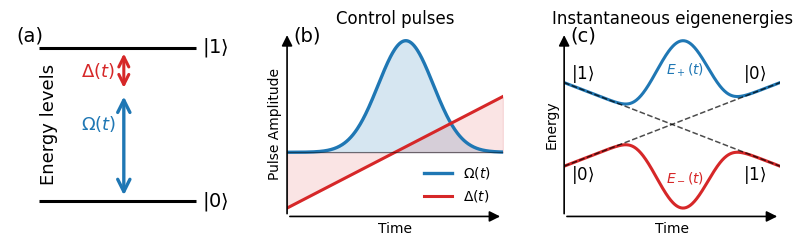

In [4]:
# Rapid adiabatic passage schematic
from matplotlib.patches import FancyArrowPatch, Polygon

rap_t = np.linspace(0.0, 1.0, 400)
rap_omega =  np.exp(-((rap_t - 0.55) / 0.18) ** 2)
rap_delta =  (rap_t - 0.5)
rap_gap = np.sqrt((rap_delta) ** 2 + (rap_omega) ** 2)
rap_E_plus = 0.5 * rap_gap
rap_E_minus = -0.5 * rap_gap

fig, axes = plt.subplots(1, 3, figsize=(8, 2.56))
FIG_RAP = fig
ax_levels, ax_pulses, ax_gap = axes
axis_arrow_style = dict(arrowstyle="-|>", mutation_scale=16, lw=1.2, color="#000000")

# Left panel: level diagram with coupling arrows
ax_levels.hlines([0.0, 1.0], 0.15, 0.95, color='black', lw=2.2)
ax_levels.text(0.98, 1.0, r'$|1\rangle$', va='center', ha='left', fontsize=14)
ax_levels.text(0.98, 0.0, r'$|0\rangle$', va='center', ha='left', fontsize=14)

omega_arrow = FancyArrowPatch((0.58, 0.02), (0.58, 0.7), arrowstyle='<->', mutation_scale=22,
                               lw=2.4, color='#1f77b4', zorder=3)
ax_levels.add_patch(omega_arrow)
ax_levels.text(0.45, 0.50, r'$\Omega(t)$', ha='center', va='center', color='#1f77b4', fontsize=13)

delta_arrow = FancyArrowPatch((0.58, 0.72), (0.58, 0.98), arrowstyle='<->', mutation_scale=18,
                               lw=2.2, color='#d62728', zorder=3)
ax_levels.add_patch(delta_arrow)

ax_levels.text(0.45, 0.85, r'$\Delta(t)$', ha='center', va='center', color='#d62728', fontsize=13)
ax_levels.text(0.20, 0.5, 'Energy levels', ha='center', va='center',rotation=90,color='black', fontsize=13)
ax_levels.set_xlim(0.0, 1.1)
ax_levels.set_ylim(-0.1, 1.1)
ax_levels.set_xticks([])
ax_levels.set_yticks([])
ax_levels.axis('off')

# Middle panel: control amplitudes
ax_pulses.plot(rap_t, rap_omega, color='#1f77b4', lw=2.4, label=r'$\Omega(t)$')
ax_pulses.fill_between(rap_t, rap_omega, color='#1f77b4', alpha=0.18)
ax_pulses.plot(rap_t, rap_delta, color='#d62728', lw=2.2, label=r'$\Delta(t)$')
ax_pulses.fill_between(rap_t, rap_delta, color='#d62728', alpha=0.12)
ax_pulses.axhline(0.0, color='black', lw=0.8, alpha=0.45)
ax_pulses.set_xlabel('Time')
ax_pulses.set_ylabel('Pulse Amplitude')
ax_pulses.set_title('Control pulses')
ax_pulses.legend(frameon=False, loc='lower right')
ax_pulses.grid(False)
ax_pulses.spines["top"].set_visible(False)
ax_pulses.spines["right"].set_visible(False)
ax_pulses.spines["left"].set_visible(False)
ax_pulses.spines["bottom"].set_visible(False)
ax_pulses.set_xticks([])
ax_pulses.set_yticks([])
ax_pulses.set_xlim(rap_t[0], rap_t[-1])
x0_p, x1_p = ax_pulses.get_xlim()
y0_p, y1_p = ax_pulses.get_ylim()
ax_pulses.annotate("", xy=(x1_p , y0_p), xytext=(x0_p, y0_p),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax_pulses.annotate("", xy=(x0_p, y1_p), xytext=(x0_p, y0_p),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
# Right panel: adiabatic energies and gap
ax_gap.plot(rap_t, rap_E_plus, color='#1f77b4', lw=2.2, label=r'$E_+(t)$')
ax_gap.plot(rap_t, rap_E_minus, color='#d62728', lw=2.2, label=r'$E_-(t)$')
ax_gap.plot(rap_t, 0.5 * rap_delta, color='black', ls='--', lw=1.1, alpha=0.7)
ax_gap.plot(rap_t, -0.5 * rap_delta, color='black', ls='--', lw=1.1, alpha=0.7)
ax_gap.set_xlabel('Time')
ax_gap.set_ylabel('Energy')
ax_gap.set_title('Instantaneous eigenenergies')
ax_gap.text(0.03, 0.3, r'$|1\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.03, -0.3, r'$|0\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.83, -0.3, r'$|1\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.83, 0.3, r'$|0\rangle$', va='center', ha='left', fontsize=12, color='black')
ax_gap.text(0.47, 0.3,r'$E_+(t)$',color='#1f77b4')
ax_gap.text(0.47, -0.35,r'$E_-(t)$',color='#d62728')
ax_gap.grid(False)
ax_gap.spines["top"].set_visible(False)
ax_gap.spines["right"].set_visible(False)
ax_gap.spines["left"].set_visible(False)
ax_gap.spines["bottom"].set_visible(False)
ax_gap.set_xticks([])
ax_gap.set_yticks([])
ax_gap.set_xlim(rap_t[0], rap_t[-1])
x0_g, x1_g = ax_gap.get_xlim()
y0_g, y1_g = ax_gap.get_ylim()
ax_gap.annotate("", xy=(x1_g, y0_g), xytext=(x0_g, y0_g),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax_gap.annotate("", xy=(x0_g, y1_g), xytext=(x0_g, y0_g),
               xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)

ax_levels.text(0.03, 0.95, '(a)', fontsize=14, transform=ax_levels.transAxes)
ax_pulses.text(0.03, 0.95, '(b)', fontsize=14, transform=ax_pulses.transAxes)
ax_gap.text(0.03, 0.95, '(c)', fontsize=14, transform=ax_gap.transAxes)
plt.tight_layout(w_pad=2.5)
plt.show()


In [5]:
from pathlib import Path

if "FIG_RAP" not in globals():
    raise RuntimeError("Run the rapid adiabatic passage schematic cell first.")

fig = FIG_RAP
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/")
png_path = output_dir / "rapid_adiabatic_passage.png"
svg_path = output_dir / "rapid_adiabatic_passage.svg"
pdf_path = output_dir / "rapid_adiabatic_passage.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/rapid_adiabatic_passage.png, /home/yehon/projects/grape-crab-qoc/results/rapid_adiabatic_passage.svg, and /home/yehon/projects/grape-crab-qoc/results/rapid_adiabatic_passage.pdf


### GRAPE pulse refinement

The GRadient Ascent Pulse Engineering (GRAPE) algorithm treats the control field as a sequence of piecewise-constant bins. At each iteration the gradient information updates the bins upward or downward, refining the full pulse envelope while keeping the time step $\Delta t$ fixed.

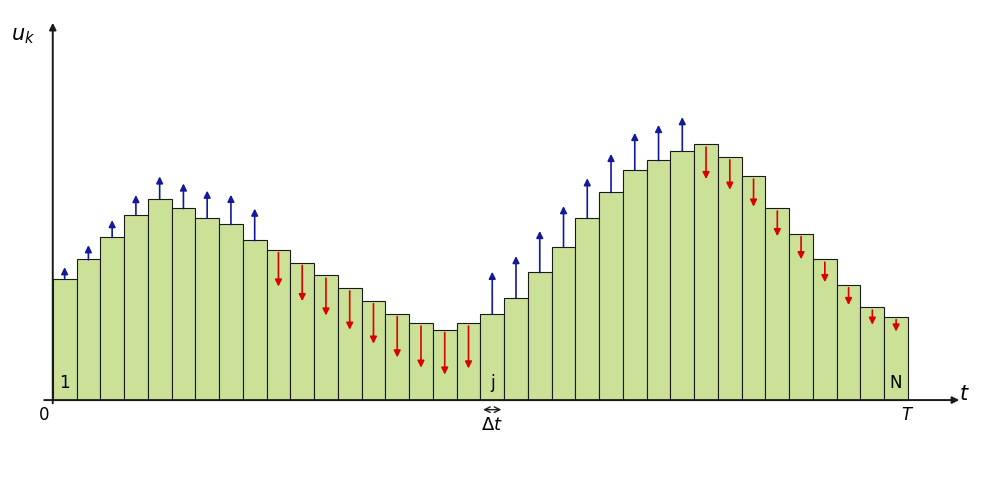

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the piecewise-constant control updates in GRAPE
amps = np.array([
    0.38, 0.44, 0.51, 0.58, 0.63, 0.60, 0.57, 0.55, 0.50, 0.47,
    0.43, 0.39, 0.35, 0.31, 0.27, 0.24, 0.22, 0.24, 0.27, 0.32,
    0.40, 0.48, 0.57, 0.65, 0.72, 0.75, 0.78, 0.80, 0.76, 0.70,
    0.60, 0.52, 0.44, 0.36, 0.29, 0.26
])
directions = np.sign(np.sin(np.linspace(0, 4 * np.pi, len(amps))))

n_bins = len(amps)
width = 1.0 / n_bins
edges = np.linspace(0.0, 1.0, n_bins, endpoint=False)
fig, ax = plt.subplots(figsize=(10, 5))
FIG_GRAPE_PULSE = fig
fig.patch.set_facecolor('white')
ax.set_facecolor("#ffffff")

norm = (amps - amps.min()) / (amps.max() - amps.min())
bar_colors = plt.cm.viridis(0.2 + 0.6 * norm)
ax.bar(
    edges,
    amps,
    width=width,
    align='edge',
    color="#cbe197",
    edgecolor='#1a1a1a',
    linewidth=0.8
)

for idx, (amp, direction) in enumerate(zip(amps, directions)):
    x_center = edges[idx] + 0.5 * width
    if direction >= 0:
        start_y = amp - 0.01
        end_y = start_y  + np.sin(np.pi * (idx + 0.5) / n_bins) * 0.1 + 0.05
        arrow_color = "#12199b"
    else:
        start_y = amp 
        end_y = start_y  - np.sin(np.pi * (idx + 0.5) / n_bins) * 0.1 - 0.05
        arrow_color = "#d90202"
    ax.annotate(
        '',
        xy=(x_center, end_y),
        xytext=(x_center, start_y),
        arrowprops=dict(arrowstyle='-|>', color=arrow_color, linewidth=1.2)
    )

axis_style = dict(arrowstyle='-|>', color='#1a1a1a', linewidth=1.4, shrinkA=0, shrinkB=0)
ax.annotate('', xy=(1.06, 0.0), xytext=(-0.01, 0.0), arrowprops=axis_style)
ax.annotate('', xy=(0.0, 1.18), xytext=(0.0, -0.01), arrowprops=axis_style)

ax.text(1.06, 0.02, r'$t$', ha='left', va='center', fontsize=15)
ax.text(-0.02, 1.14, r'$u_k$', ha='right', va='center', fontsize=15)
ax.text(1.0, -0.02, r'$T$', ha='center', va='top', fontsize=12)
ax.text(-0.01, -0.02, r'$0$', ha='center', va='top', fontsize=12)

first_center = edges[0] + 0.5 * width
mid_index = 18
last_center = edges[-1] + 0.5 * width
ax.text(first_center, 0.08, '1', ha='center', va='top', fontsize=12)
ax.text(edges[mid_index] + 0.5 * width, 0.08, 'j', ha='center', va='top', fontsize=12)
ax.text(last_center, 0.08, 'N', ha='center', va='top', fontsize=12)

ax.annotate(
    '',
    xy=(edges[mid_index], -0.03),
    xytext=(edges[mid_index] + width, -0.03),
    arrowprops=dict(arrowstyle='<->', color='#1f1f1f', linewidth=1.0)
)
ax.text(edges[mid_index] + 0.5 * width, -0.05, r'$\Delta t$', ha='center', va='top', fontsize=13)

ax.set_xlim(-0.05, 1.08)
ax.set_ylim(-0.25, 1.22)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.margins(x=0)
plt.tight_layout()
plt.show()


In [57]:
# save GRAPE pulse refinement figure 

if "FIG_GRAPE_PULSE" not in globals():
    raise RuntimeError("Run the GRAPE pulse refinement cell first.")

fig = FIG_GRAPE_PULSE
fig.canvas.draw()
output_dir = Path("/home/yehon/projects/grape-crab-qoc/results/")
png_path = output_dir / "grape_pulse_refinement.png"
svg_path = output_dir / "grape_pulse_refinement.svg"
pdf_path = output_dir / "grape_pulse_refinement.pdf"
fig.savefig(png_path, dpi=300, bbox_inches="tight")
fig.savefig(svg_path, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
print(f"Saved {png_path}, {svg_path}, and {pdf_path}")


Saved /home/yehon/projects/grape-crab-qoc/results/grape_pulse_refinement.png, /home/yehon/projects/grape-crab-qoc/results/grape_pulse_refinement.svg, and /home/yehon/projects/grape-crab-qoc/results/grape_pulse_refinement.pdf


In [60]:
x=10
y=x
x=5
print('y=',y)
x=[10]
y=x
x[0]=5
print('y=',y)
x=[10]
y=x
x=[5]
print('y=',y)

y= 10
y= [5]
y= [10]
